In [1]:
import copy
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import matplotlib.gridspec as gridspec

import palettable

In [4]:
import verdict

In [5]:
import stained_glass.idealized as idealized
import stained_glass.stats as stats
import stained_glass.sample as sample

# Parameters

In [6]:
# Number of sightlines
n = 10000
r_clump = 6.
sidelength = 600.
annuli = np.array([ 20., 100., 200., 300. ])
levels = np.array([ 1., 2., 3., 4., 5., 6. ])
edges_log = np.logspace( -1., np.log10( sidelength) , 16 )
edges = np.linspace( 0., sidelength, 16 )

In [7]:
xs = edges[:-1] + 0.5 * ( edges[1] - edges[0] )

In [8]:
xs_log = 10.**( np.log10( edges_log[:-1] ) + 0.5 * ( np.log10( edges_log[1] ) - np.log10( edges_log[0] ) ) )

In [9]:
n_per_bin = round( n / (edges_log.size - 1 ) / 2 )

##### DEBUG
xs_log = xs
edges_log = edges

# Setup idealized projections

In [10]:
ips = []
all_length_scales = []

# Radial distribution
ip = idealized.IdealizedProjection( sidelength )
ip.add_ellipse(
    c = (0., 0.),
    a = 90.,
    value = levels[5],
)
length_scales = {}
length_scales['core'] = 90.

structs, values = copy.copy( ip.structs ), copy.copy( ip.struct_values )
for i, (struct, value) in enumerate( zip( *[ structs, values ] ) ):
    ip.add_concentric_structures(
        struct,
        value = levels[5],
        n_concentric = 4,
        dr = 30.,
    )

ips.append( ip )
all_length_scales.append( length_scales )

In [11]:
# Radial distribution
ip = idealized.IdealizedProjection( sidelength )
ip.add_sphere(
    c = (0., 0.),
    r = 300.,
    n_annuli = 64,
    value = levels[-1],
)
length_scales = {}
length_scales['main'] = 300.
length_scales['annuli'] = 100.

ips.append( ip )
all_length_scales.append( length_scales )

In [12]:
# Radial distribution and satellite
ip = idealized.IdealizedProjection( sidelength )
r = 300.
ip.add_sphere(
    c = (0., 0.),
    r = r,
    value = levels[-1],
    n_annuli = 64,
)
den = levels[-1] / ( 2. * r )
mass = den * ( 4. / 3. * np.pi * r**3. )

r_sat = 150.
mass_sat = mass / 10.
den_sat = mass_sat / ( 4. / 3. * np.pi * r_sat**3. )
value_sat = den_sat * 2. * r_sat
ip.add_sphere(
    c = (180., 180.),
    r = 150.,
    value = value_sat,
    n_annuli = 64,
)
length_scales = {}
length_scales['main'] = r
length_scales['annuli'] = 100.
length_scales['satellite'] = r_sat

ips.append( ip )
all_length_scales.append( length_scales )

# Radial distribution and satellite
ip = idealized.IdealizedProjection(sidelength)
ip.add_ellipse(
    c = (0., 0.),
    a = 90.,
    value = levels[5],
)
length_scales = {}
length_scales['core'] = 90.
ip.add_ellipse(
    c = (180., 180.),
    a = 40.,
    value = levels[4],
)
length_scales['satellite'] = 40.

structs, values = copy.copy( ip.structs ), copy.copy( ip.struct_values )
for i, (struct, value) in enumerate( zip( *[ structs, values ] ) ):
    ip.add_concentric_structures(
        struct,
        value = levels[5],
        n_concentric = 4,
        dr = 30.,
    )

ips.append( ip )
all_length_scales.append( length_scales )

# Clumps
ip = idealized.IdealizedProjection(sidelength)
ip.add_clumps(
    r_clump = r_clump,
    c = (0., 0.),
    r_area = 150.,
    fcov = 0.5,
    value = levels[5],
)
length_scales = {}
length_scales['core'] = 150.
length_scales['clump'] = r_clump

structs, values = copy.copy( ip.structs ), copy.copy( ip.struct_values )
for i, (struct, value) in enumerate( zip( *[ structs, values ] ) ):
    ip.add_concentric_structures(
        struct,
        value = levels[5],
        n_concentric = 4,
        dr = 10.,
    )

ips.append( ip )
all_length_scales.append( length_scales )

In [13]:
# Filament
ip = idealized.IdealizedProjection(sidelength)
ip.add_curve(
    v1 = (0., 0.),
    v2 = (-300., 60.),
    theta_a = 20.,
    theta_b = 60.,
    value = levels[-1],
)
length_scales = {}
length_scales['long'] = np.sqrt( 300.**2. + 60.**2. )

structs, values = copy.copy( ip.structs ), copy.copy( ip.struct_values )
for i, (struct, value) in enumerate( zip( *[ structs, values ] ) ):
    width = 40.
    n_concentric = 40
    ip.add_concentric_structures(
        struct,
        value = levels[5],
        n_concentric = n_concentric,
        dr = width / n_concentric,
        dv = ( levels[0] - levels[-1] ) / n_concentric
    )

ips.append( ip )
all_length_scales.append( length_scales )

# All of the above
ip = idealized.IdealizedProjection(sidelength)
ip.add_ellipse(
    c = (0., 0.),
    a = 90.,
    value = levels[5],
)
length_scales = {}
length_scales['core'] = 90.
ip.add_ellipse(
    c = (180., 180.),
    a = 60.,
    value = levels[4],
)
length_scales['satellite'] = 60.
ip.add_clumps(
    r_clump = r_clump,
    c = (0., 0.),
    r_area = 150.,
    fcov = 0.5,
    value = levels[5],
)
length_scales['clump'] = r_clump
ip.add_curve(
    v1 = (0., 0.),
    v2 = (-300., 60.),
    theta_a = 20.,
    theta_b = 60.,
    value = levels[5],
)
length_scales['filament'] = np.sqrt( 300.**2. + 60.**2. )

structs, values = copy.copy( ip.structs ), copy.copy( ip.struct_values )
for i, (struct, value) in enumerate( zip( *[ structs, values ] ) ):
    ip.add_concentric_structures(
        struct,
        value = levels[5],
        n_concentric = 4,
        dr = 30.,
    )

ips.append( ip )
all_length_scales.append( length_scales )

# Add backgrounds
[ ip.add_background( levels[0] ) for ip in ips ]

In [14]:
# Generate Projections
[ ip.generate_idealized_projection() for ip in ips ]

[None, None, None]

# Calculate Metrics

In [15]:
all_tpcfs = {}

### Calculate weighted TPCF

In [16]:
tpcfs = []
means = []
for i, ip in enumerate( ips ):
    
    # Get data
    ip.generate_sightlines( n )
    ws = ip.evaluate_sightlines()
    coords = np.array([ ip.sl_xs, ip.sl_ys ]).transpose()
    
    tpcf, edges = stats.weighted_tpcf(
        coords,
        ws,
        edges_log,
    )
    
    tpcfs.append( tpcf )
    
    # Store the fiducially-sampled mean for more consistent normalization later
    means.append( np.nanmean( ws ) )
    
all_tpcfs[( 'W', )] = tpcfs

/Users/zhafen/repos/stained_glass/stained_glass/stats.py:469: RuntimeWarning: invalid value encountered in true_divide
  result /= scaling


### Generate Paired Coordinates

In [17]:
v_edges = np.array([ ip.ip_values.min(), ip.ip_values.max() ])

In [18]:
pair_sampler = sample.PairSampler( ip.sidelength, edges_log, v_edges )
dr_coords1, dr_coords2 = pair_sampler.generate_pair_sampling_coords(
    n_per_bin = n_per_bin,
)

In [19]:
pair_coords = np.concatenate([ np.concatenate( dr_coords1 ), np.concatenate( dr_coords2 ) ])

In [20]:
# Get the normalizations using the means from non-paired sampling
means = np.array( means )
normalizations = means ** -2.

### Calculate annuli-binned, pair-sampled, weighted TPCF

In [21]:
tpcfs = []
annuli_medians = []
for i, ip in enumerate( ips ):
    
    # Get data
    ip.set_sightlines( pair_coords )
    ws = ip.evaluate_sightlines()
    
    tpcf, edges = stats.annuli_weighted_tpcf(
        pair_coords,
        ws,
        edges_log,
        r_bins = annuli,
#         normalization = normalizations[i],
    )
    
    tpcfs.append( tpcf )
    
    # Annuli medians for later use
    medians = []
    r = np.sqrt( ( pair_coords**2. ).sum( axis=1 ) )
    for i in range( len( annuli ) - 1 ):
        in_annuli = ( annuli[i] < r ) & ( r < annuli[i+1] ) 
        medians.append( np.nanmedian( ws[in_annuli] ) )
    annuli_medians.append( medians )
    
all_tpcfs[( 'A', 'PS', 'W', )] = tpcfs

/Users/zhafen/repos/stained_glass/stained_glass/stats.py:374: RuntimeWarning: invalid value encountered in true_divide
  result /= dd
/Users/zhafen/repos/stained_glass/stained_glass/stats.py:435: RuntimeWarning: invalid value encountered in true_divide
  bin_average = bin_sum / dd
/Users/zhafen/repos/stained_glass/stained_glass/stats.py:464: RuntimeWarning: invalid value encountered in true_divide
  scaling = bin_square_sum / dd


### Calculate pair-sampled, weighted TPCF

In [22]:
tpcfs = []
for i, ip in enumerate( ips ):
    
    # Get data
    ip.set_sightlines( pair_coords )
    ws = ip.evaluate_sightlines()
    
    tpcf, edges = stats.weighted_tpcf(
        pair_coords,
        ws,
        edges_log,
    )
    
    tpcfs.append( tpcf )
    
all_tpcfs[( 'PS', 'W', )] = tpcfs

# Plot the Different Metrics

In [23]:
all_tpcfs = verdict.Dict( all_tpcfs )

In [24]:
ncols = len( ips )
nrows = 2

In [25]:
def label_or_not( label, do_label ):
    
    if do_label:
        return label
    
    return None

In [26]:
colors = palettable.matplotlib.Viridis_4.mpl_colors[1:][::-1]

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


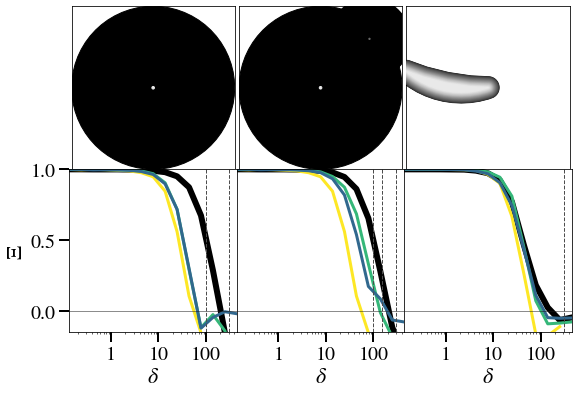

In [27]:
fig = plt.figure( figsize=(3*ncols, 3*nrows), facecolor='w' )
ax = plt.gca()

gs = gridspec.GridSpec( nrows, ncols )
gs.update( wspace=0.0001, hspace=0.0001 )

for i, ip in enumerate( ips ):
    
    # Plot the idealized image
    ax = plt.subplot( gs[0,i], )
    ip.plot_idealized_projection(
        ax,
#         cmap = plt.get_cmap( 'Greys' ),
        cmap = plt.get_cmap( 'Greys_r' ),
        vmin = 0,
#         vmax = levels.max(),
    )
    
    # DEBUGL
#     ip.set_sightlines( pair_coords[:50] )
#     ip.plot_sightlines( ax, s=3, zorder=10000 )
    
    # Circles for annuli
    for k in range( len( annuli ) - 1 ):
        shift = 5.
        for r in [ annuli[k] + shift, annuli[k+1] - shift*2 ]:
            cir = plt.Circle(
                (0,0),
                radius=r,
                edgecolor=colors[k],
                facecolor='none',
                linewidth = 4,
            )
            cir.set_zorder( 1000 )
#             ax.add_patch( cir )
    
    # Fiducial
    ax = plt.subplot( gs[1,i], )
    
    ax.set_ylim( -0.1, 1. )
    
    # TPCFs
    tpcf = all_tpcfs[( 'PS', 'W', )][i]
    ax.plot(
        xs_log,
        tpcf,
        linewidth = 6,
        color = 'k',
        label = label_or_not( 'no radial normalization', ax.is_first_col() ),
        zorder = -1,
    )
    
    ax.set_ylim(-0.1, 1. )
 
    # Annuli
    tpcfs = all_tpcfs[( 'A', 'PS', 'W', )][i]
    for k, tpcf in enumerate( tpcfs ):
        ax.plot(
            xs_log,
            tpcf,
            linewidth = 3,
            color = colors[k],
        )
    ax.set_ylim( -0.15, 1. )
    
# Go back through and fix up axes
for i in range( ncols ):
    for j in range( nrows ):
        
        ax = plt.subplot( gs[j,i], )
        
        # Projection Plot options
        if j < 1:
            
            ax.set_aspect( 'equal' )
            ax.tick_params( labelleft=False, labelbottom=False, left=False, bottom=False)
            
        # Statistics options
        if j >= 1:
            
            # Length scales
            for key, item in all_length_scales[i].items():
                ax.axvline(
                    item,
                    linewidth = 1.,
                    color = '.3',
                    linestyle = '--',
                )
                
            ax.axhline(
                color = '0.1',
                linewidth = 0.5,
            )
            
            # Remove tick labels
            if not ax.is_first_col():
                ax.tick_params( labelleft=False, left=False, )
            if not ax.is_last_row():
                ax.tick_params( labelbottom=False, bottom=False, )
            ax.tick_params( which='minor', bottom=True, )
            
            # Axis tweaks
            ax.set_xlim( xs_log[0], xs_log[-1] )
            ax.set_xscale( 'log' )
            
            # Make sure enough ticks show up
            locmaj = matplotlib.ticker.LogLocator( base=10, numticks=12 ) 
            ax.xaxis.set_major_locator( locmaj )
            locmin = matplotlib.ticker.LogLocator( base=10.0, subs=np.arange( 0.1, 1., 0.1), numticks=12 )
            ax.xaxis.set_minor_locator( locmin )
            ax.xaxis.set_minor_formatter( matplotlib.ticker.NullFormatter() )
            
            # Format more nicely
            replacements = {
                1.: '1',
                10.: '10',
                100.: '100',
            }
            new_labels = []
            for ii, old_label in enumerate( ax.get_xticklabels() ):
                label = old_label
                for val, s in replacements.items():
                    if np.isclose( ax.get_xticks()[ii], val ):
                        label = s
                        break            
                new_labels.append( label )
            ax.set_xticklabels( new_labels )

            if ax.is_last_row():
                ax.set_xlabel( r'$\delta$', fontsize=22 )
            if ax.is_first_col():
                ax.set_ylabel( r'$\Xi$', fontsize=22 )
          
#             # Legend
#             if ax.is_first_col():
#                 ax.legend(
#                     bbox_to_anchor = (0.0, 2.02, 5., 0.5 ),
#                     loc = 'lower left',
#                     ncol = 4,
#                     mode = "expand",
#                     borderaxespad = 0.,
#                     prop = {'size': 16},
#                 )

# lgd = fig.legend(
# #     bbox_to_anchor = (0.1, 0.87, 0.7, 1.0 ),
#     loc = 'lower left',
#     ncol = 4,
#     mode = "expand",
#     borderaxespad = 0.,
#     prop = {'size': 16},
# )

fig.savefig('./weighted_correlations.pdf', bbox_inches='tight')

In [28]:
ips[0].ip_values

array([-1.06479427e+00, -4.35016749e-01, -3.29653044e-01, -2.74414221e-01,
       -2.38669116e-01, -2.12958855e-01, -1.93230824e-01, -1.77413677e-01,
       -1.64321761e-01, -1.53220119e-01, -1.43625310e-01, -1.35204336e-01,
       -1.27719217e-01, -1.20994662e-01, -1.14898265e-01, -1.09327848e-01,
       -1.04203102e-01, -9.94598924e-02, -9.50462762e-02, -9.09196631e-02,
       -8.70447423e-02, -8.33919471e-02, -7.99362973e-02, -7.66565155e-02,
       -7.35343427e-02, -7.05540029e-02, -6.77017793e-02, -6.49656758e-02,
       -6.23351438e-02, -5.98008605e-02, -5.73545471e-02, -5.49888189e-02,
       -5.26970604e-02, -5.04733218e-02, -4.83122306e-02, -4.62089186e-02,
       -4.41589580e-02, -4.21583083e-02, -4.02032703e-02, -3.82904455e-02,
       -3.64167027e-02, -3.45791473e-02, -3.27750957e-02, -3.10020520e-02,
       -2.92576878e-02, -2.75398248e-02, -2.58464185e-02, -2.41755445e-02,
       -2.25253856e-02, -2.08942208e-02, -1.92804147e-02, -1.76824088e-02,
       -1.60987127e-02, -

**Switch to co-adding instead of picking highest value.**